## GMT110 PROGRAMMING IN GEOMATICS ENGINEERING 
## MIDTERM EXAM - ASSIGNMENT

- In this midterm assignment you need to complete 5 tasks and 1 bonus task.
- The tasks will require to use QGIS, Python, Jupyter Notebook or Google Colab IDE and Google Drive.
- You will use some text files (.csv) that can be loaded directly to your environment from the WEB links provided. Downloading is not necessary.
- Please use your own coding skills. Using all kind of WEB materials are free. Using help from your friends is strongly not recommended. 
- Due date for submission is 29.04.2023 - 13:00 PM
- This file will not work on TEAM's python environment thus you have to download it open in your own Jupyter or Colab IDE.
- If you are having difficulties when importing the necessary libraries to the Jupyter Notebook, you can use google colab.

Good Luck

Please write your Name and ID below.

## TASK1 (20 pts)

- <b> In this task you are going to geo-reference an image which has coordinates information available on the map image itself. 
- <b> The images you are going to geo-reference are available at https://www.harita.gov.tr/urunler/indirilebilir-il-haritalari/18. 
- <b> Each student must check [this link](https://github.com/GeoTurkey/GMT_COURSES/blob/main/MIDTERM_TASK.csv) and download the relevant city map under the column "MapRegion" assigned to his/her name from the WEB site above. Be careful!!! You have to download and work with only the "Fiziki İl Haritası" of your city.
- <b> Do not worry that the images in this site are in the PDF format. QGIS is able to recognize PDF as an image and you can directly geo-reference it without converting to any image format such as jpeg or png...
- <b> After you geo-referenced your map please save it as a tiff image in your computer, create one google drive link of that image and share the link in the below cell so I can download it and open with QGIS.

In [ ]:
# Paste the link below.

In [ ]:
https://drive.google.com/drive/folders/10bf-RJeSA18PrI8goCiiLsvX0LVheyQY?usp=sharing

## TASK2 (20 pts)

<b>For this task you are going to use two files.
- 1)<b> First of them is the turkey_cities.csv at https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/turkey_cities.csv which gives the latitude and longitude information (geographic coordinates) of the city centers in Turkey.
    
- 2)<b> The second one is 2022_turkey_age_population.csv at https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/2022_turkey_age_population.csv which provides population number of different age groups in Turkey based on cities.

### Write your answers and codes for each tasks (a-h) below. 

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

- <b>a) Import these two csv files as dataframes df_1 and df_2 in order.

In [10]:
import pandas as pd

df_1 = pd.read_csv("C:\\Users\\ASUS\\Desktop\\turkey_cities.csv")
df_2 = pd.read_csv("C:\\Users\\ASUS\\Desktop\\2022_turkey_age_population.csv")


- <b>b) Merge these two Pandas DataFrames on certain column using the merge function. The new merged dataframe's name must be "df_merged".

In [93]:
df_merged = df_1.merge(df_2)
df_merged

,City,Latitude,Longitude,Total_Population,0-14,15-65,65<
0,ADANA,36.98451,35.33368,2 274 106,539 247,1 523 411,211 448
1,ADIYAMAN,37.75545,38.27349,635 169,177 617,404 271,53 281
2,AFYONKARAHİSAR,38.75812,30.53685,747 555,155 692,503 604,88 259
3,AĞRI,39.71467,43.04015,510 626,168 409,314 555,27 662
4,AMASYA,40.65157,35.82666,338 267,59 219,226 126,52 922
...,...,...,...,...,...,...,...
76,İSTANBUL,41.02196,29.01079,15 907 951,3 263 822,11 433 263,1 210 866
77,İZMİR,38.41026,27.15296,4 462 056,793 333,3 115 345,553 378
78,SİNOP,42.02460,35.14104,220 799,34 488,141 617,44 694
79,BALIKESİR,39.65054,27.89536,1 257 590,202 573,848 000,207 017


- <b>c) Convert the datatype of each column of this merged dataframe except the city to the numeric integer type.

In [98]:
import numpy as np

df_merged[['Longitude', 'Latitude']] = df_merged[['Longitude', 'Latitude']].astype(np.int64)

for i in df_merged.select_dtypes(include='object'):
    if i != "City":
        df_merged[i] = df_merged[i].str.replace(',', '').str.replace(' ', '').astype(np.int64)

df_merged

,City,Latitude,Longitude,Total_Population,0-14,15-65,65<
0,ADANA,36,35,2274106,539247,1523411,211448
1,ADIYAMAN,37,38,635169,177617,404271,53281
2,AFYONKARAHİSAR,38,30,747555,155692,503604,88259
3,AĞRI,39,43,510626,168409,314555,27662
4,AMASYA,40,35,338267,59219,226126,52922
...,...,...,...,...,...,...,...
76,İSTANBUL,41,29,15907951,3263822,11433263,1210866
77,İZMİR,38,27,4462056,793333,3115345,553378
78,SİNOP,42,35,220799,34488,141617,44694
79,BALIKESİR,39,27,1257590,202573,848000,207017


- <b>d) Create three new columns that each showing the ratio of each age group among the total population for each city. 

In [13]:
df_merged['Under_18_Ratio'] = df_merged['0-14'] / df_merged['Total_Population']
df_merged['15_to_65_Ratio'] = df_merged['15-65'] / df_merged['Total_Population']
df_merged['Over_65_Ratio'] = df_merged['65<'] / df_merged['Total_Population']

print(df_merged)

              City  Latitude  Longitude  Total_Population     0-14     15-65  \
0            ADANA        36         35           2274106   539247   1523411   
1         ADIYAMAN        37         38            635169   177617    404271   
2   AFYONKARAHİSAR        38         30            747555   155692    503604   
3             AĞRI        39         43            510626   168409    314555   
4           AMASYA        40         35            338267    59219    226126   
..             ...       ...        ...               ...      ...       ...   
76        İSTANBUL        41         29          15907951  3263822  11433263   
77           İZMİR        38         27           4462056   793333   3115345   
78           SİNOP        42         35            220799    34488    141617   
79       BALIKESİR        39         27           1257590   202573    848000   
80         DENİZLİ        37         29           1056332   201086    729101   

        65<  Under_18_Ratio  15_to_65_R

- <b>e) Write down the code that outputs the cities for which the ratio of people over 65 is greater than 0-14 ratio age group.

In [14]:
df_merged['0-14 Ratio'] = df_merged['0-14'] / df_merged['Total_Population']
df_merged['15-65 Ratio'] = df_merged['15-65'] / df_merged['Total_Population']
df_merged['65+ Ratio'] = df_merged['65<'] / df_merged['Total_Population']
selected_cities = df_merged[df_merged['65+ Ratio'] > df_merged['0-14 Ratio']]['City']
print(selected_cities)

7         ARTVİN
15     ÇANAKKALE
19        EDİRNE
25       GİRESUN
32     KASTAMONU
34    KIRKLARELİ
56       TUNCELİ
68        BARTIN
78         SİNOP
79     BALIKESİR
Name: City, dtype: object


- <b>f) Write the code that gives the first 5 cities with the highest ratio of young people in the total city population.

In [15]:
df_sorted = df_merged.sort_values(by=['0-14'], ascending=False)
df_top5 = df_sorted.head(5)
print(df_top5[['City', '0-14', 'Total_Population']])

         City     0-14  Total_Population
76   İSTANBUL  3263822          15907951
5      ANKARA  1138230           5782285
57  ŞANLIURFA   833891           2170110
77      İZMİR   793333           4462056
14      BURSA   664472           3194720


- <b>g) Just write the code that only prints the infos of your city (MapRegion column from teh excel).  

In [16]:
print(df_merged[df_merged["City"] == "TOKAT"])

     City  Latitude  Longitude  Total_Population    0-14   15-65    65<  \
54  TOKAT        40         36            596454  109139  396725  90590   

    Under_18_Ratio  15_to_65_Ratio  Over_65_Ratio  0-14 Ratio  15-65 Ratio  \
54         0.18298        0.665139       0.151881     0.18298     0.665139   

    65+ Ratio  
54   0.151881  


- <b>h1) Write a code that saves your city data (row) alone as one csv file.
- <b>h2) Load that csv file to QGIS as a point shapefile on top of the geo-referenced map you finished in the first task. Change the point symbology to a red triangle and make its "Total_Population" label visible on map layout. Save the map as an image, create a google drive link and paste the link below.     

In [17]:
tokat_data = df_merged.query('City == "TOKAT"')
tokat_data.to_csv("Tokat.csv", index=False)
tokat_data

,City,Latitude,Longitude,Total_Population,0-14,15-65,65<,Under_18_Ratio,15_to_65_Ratio,Over_65_Ratio,0-14 Ratio,15-65 Ratio,65+ Ratio
54,TOKAT,40,36,596454,109139,396725,90590,0.18298,0.665139,0.151881,0.18298,0.665139,0.151881


In [ ]:
https://drive.google.com/file/d/1I2UxGMIMLxdgNC_V-kdM6Zk-jMkuoTmz/view?usp=sharing

## TASK3 (20 pts)

###### <b>For this task you are going to use two files.
- 1)<b> Turkey_Province_GH.csv at https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/Turkey_Province_GH.csv which gives the latitude and longitude information of the city districts of the Turkey.
    
- 2)<b>Turkey_geoid.tif file at  https://github.com/GeoTurkey/GMT_COURSES/blob/main/turkey_geoid.tif?raw=true which shows the geoid heights of Turkey as a DEM image.

- <b> You first need to download the Turkey_Province_GH.csv and turkey_geoid.tif from the given links and upload both of them to QGIS. Be careful that their coordinate system must be the same (WGS 84 - EPSG:4326).
- <b> Then you need to sample the geoid height values of rasters for given district points in the Turkey_Province_GH. You can do that by applying "Sample Raster Values" function in QGIS. The output column name must be "geoid_height".  Check the "Sample Raster Values in QGIS" from the Internet for help.
- <b> You can save the sampled data as a csv file to your computer with the name "turkey_district_geoid.csv.
     [Here](https://github.com/GeoTurkey/GMT_COURSES/blob/main/sample_geoid.csv) you can find the sample data from the expected output
- <b> Please create a drive link for that .csv file too and share the link below.

In [ ]:
https://drive.google.com/file/d/1CYZER6LU8X4Azp0PAy86mhRlO5PJEcmq/view?usp=sharing

#### Next tasks will be relevant with the .csv file created above ("turkey_district_geoid.csv")

- <b>a) Import the data and create a dataframe called df.

In [18]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\turkey_district_geoid.csv")

print(df.head())


    City Province      Type  Latitude  Longitude  geoid_height1
0  ADANA   SEYHAN  District  36.99257   35.27320      26.599787
1  ADANA  YÜREĞİR  District  36.95687   35.34712      26.417044
2  ADANA   ALADAĞ  District  37.54996   35.39295      31.887707
3  ADANA   CEYHAN  District  36.99161   35.82259      28.075817
4  ADANA     FEKE  District  37.80933   35.90697      32.540089


- <b>b) Print the number of "NaN" geoid_height values in the dataframe and replace them with the mean value of the geoid height column. 

In [77]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\turkey_district_geoid.csv")

num_nan = df['geoid_height1'].isna().sum()
mean_geoid_height = df['geoid_height1'].mean()
df['geoid_height1'].fillna(mean_geoid_height, inplace=True)
print(f'Number of NaN values in geoid_height column: {num_nan}')
num_nan = df['geoid_height1'].isna().sum()
print(f'Number of NaN values in geoid_height column after imputation: {num_nan}')

Number of NaN values in geoid_height column: 8
Number of NaN values in geoid_height column after imputation: 0


- <b>c) Group the df dataframe  by the "City" column and print the mean geoid_heights per each city. You can check [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) for pandas.DataFrame.groupby.

In [71]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ASUS\Desktop\turkey_district_geoid.csv")
df['geoid_height1'].fillna(df['geoid_height1'].mean(), inplace=True)
print(df.groupby('City')['geoid_height1'].mean())

City
ADANA             29.443597
ADIYAMAN          28.611135
AFYONKARAHİSAR    37.660032
AKSARAY           35.756992
AMASYA            33.488543
                    ...    
ÇORUM             34.738779
İSTANBUL          36.694088
İZMİR             38.460058
ŞANLIURFA         25.175277
ŞIRNAK            21.030869
Name: geoid_height1, Length: 81, dtype: float64


- <b>d) Write the code which prints the districts having the geoid height higher than 38.00 m.

In [69]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ASUS\Desktop\turkey_district_geoid.csv")
print(df[df['geoid_height1'] > 38.00]['Province'])

24           BAYAT
25        BOLVADİN
27        ÇOBANLAR
30         EMİRDAĞ
32         HOCALAR
          ...     
910        MENEMEN
912    SEFERİHİSAR
916           URLA
917     KARABAĞLAR
918       BAYRAKLI
Name: Province, Length: 154, dtype: object


- <b>e) Write the code which prints the districts having the maximum and minimum geoid heights. 

In [67]:
import pandas as pd

df = pd.read_csv("C:/Users/ASUS/Desktop/turkey_district_geoid.csv").fillna(df['geoid_height1'].mean())

print(f"The district with the maximum geoid height is {df.loc[df['geoid_height1'].idxmax()]['Province']}.")
print(f"The district with the minimum geoid height is {df.loc[df['geoid_height1'].idxmin()]['Province']}.")

The district with the maximum geoid height is AYVACIK.
The district with the minimum geoid height is SİLOPİ.


- <b>f) Plot all the districts in the  dataframe into a 2D frame using matplotlib *scatter* function and latitude and longitude data in the dataframe.

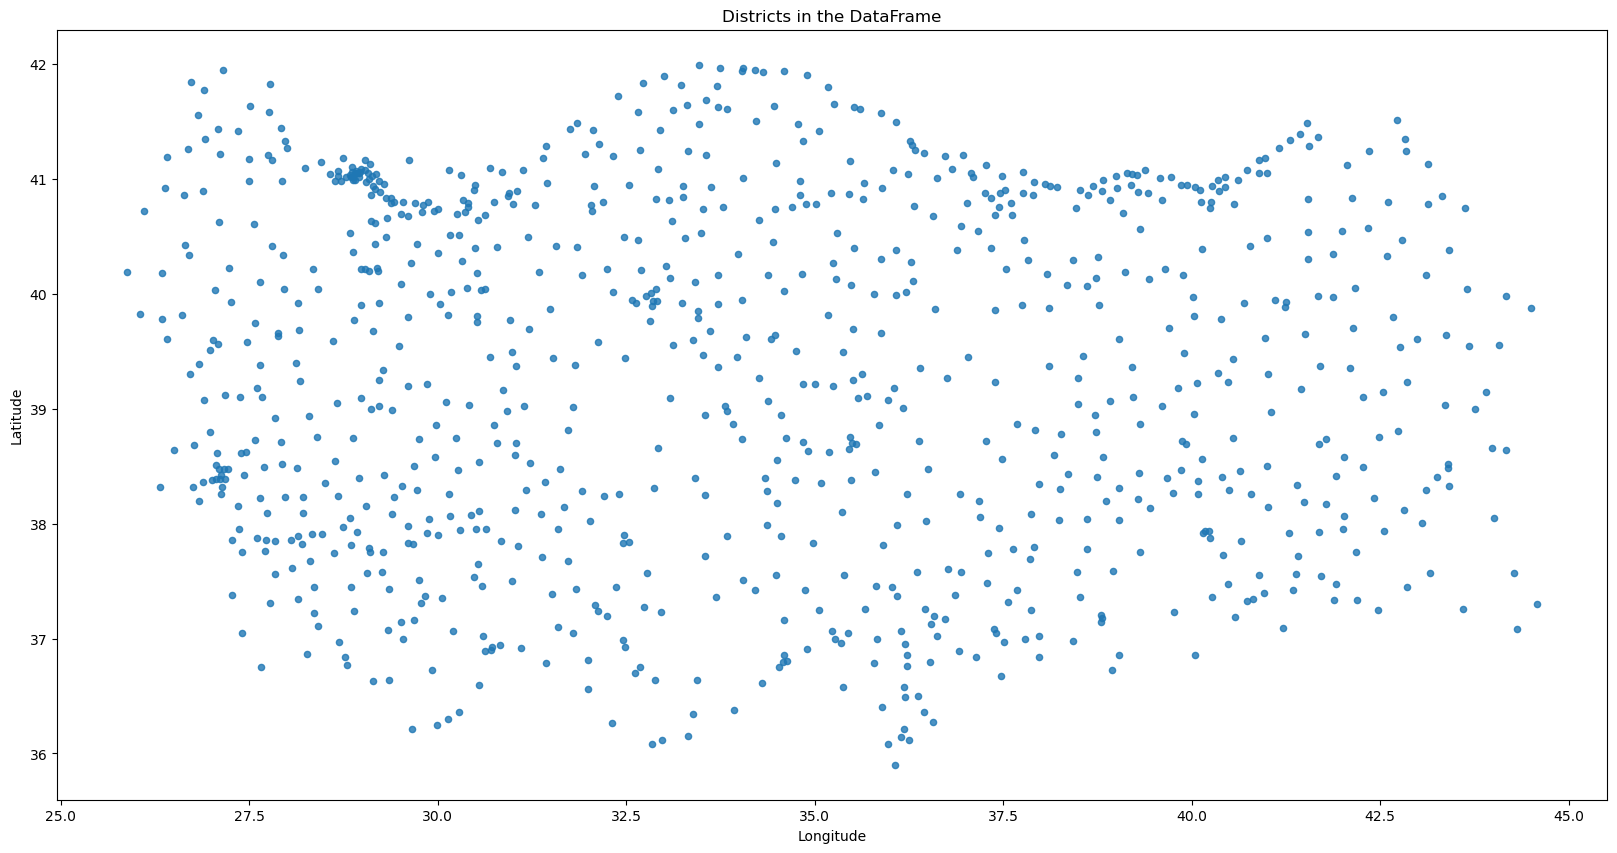

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\ASUS\Desktop\turkey_district_geoid.csv")
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.8,figsize=(20,10))

plt.title('Districts in the DataFrame')
plt.show()

## TASK4 (20 pts)

- <b>In this task you will use Pandas Datareader to read historical stock prices from Yahoo! Finance database and plot them using the matplotlib library.
- <b> You will evaluate the three years data of stock price between 2020 - 2023.
- <b> Each student is assigned to analyse a specific stock data. You can find your relevant dataset from [this link](https://github.com/GeoTurkey/GMT_COURSES/blob/main/MIDTERM_TASK.csv) under the column name "StockData".

<b>To complete this task and load the relevant stock data to your environment you should install the "pandas_datareader" library. After install this library you may need to restart your kernel.

In [ ]:
pip install pandas-datareader

### For help the necessary libraries and codes to load the stock data are given below.

In [106]:
# Here the necessary libraries and codes to start 

import pandas as pd
import pandas_datareader.data as web

import matplotlib.pyplot as plt
from matplotlib import rc

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Get the stock data 

stock_data = "MU"  # xxx - write your own stock data abbreviation given in the list. 

df = web.DataReader(stock_data, data_source='stooq', start='2020-01-01', end='2023-01-01')
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,49.4450,50.0200,49.1250,49.9800,1.198983e+07
2022-12-29,49.4000,50.9250,49.3400,50.6500,1.320426e+07
2022-12-28,49.8400,51.0850,48.8250,49.1200,1.251874e+07
2022-12-27,49.6100,50.3100,48.5170,50.0200,1.515913e+07
2022-12-23,49.0000,50.5500,48.9850,50.2000,1.742571e+07
...,...,...,...,...,...
2020-01-08,57.6333,57.9311,56.6105,57.0686,2.999115e+07
2020-01-07,54.9453,57.9411,54.9253,57.8126,5.070173e+07
2020-01-06,53.3279,53.7133,52.7462,53.1436,1.894037e+07


### Write your answers and codes for each tasks (a-f) below. 

- <b>a) Plot the "Close" data for each year as a time-series: 2021, 2022, 2023 using the subplot (3 rows x 1 column) and object oriented apporach of the matplotlib. Each plot will illustrate one year. Please add xlabel, ylabel and title to each plot in the figure. Use different colors for each plot line. You may need to seperate your data into three different dataframe for each year and then plot it.

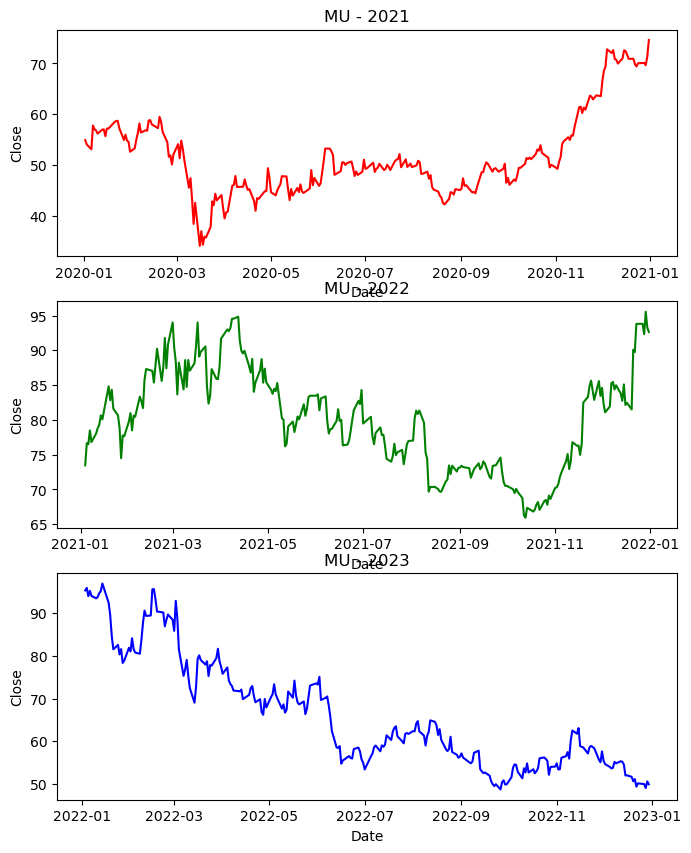

In [107]:
df_2021, df_2022, df_2023 = [df.loc[str(year)] for year in range(2020, 2023)]

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

for i, df_year in enumerate([df_2021, df_2022, df_2023]):
    axs[i].plot(df_year.index, df_year['Close'], color=['red', 'green', 'blue'][i])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Close')
    axs[i].set_title(f'MU - {2021+i}')

plt.show()

- <b>b) Plot the high and low columns of your stock data as a time series on the same plot. There will be only one plot and the data must be plotted with different colors. Please add xlabel, ylabel, title and legend to show which data is which color in your plot.

<AxesSubplot:title={'center':'MU - High and Low'}, xlabel='Date', ylabel='Price'>

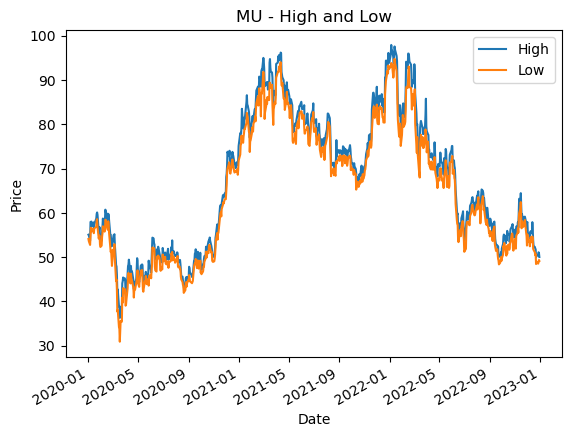

In [108]:
df.plot(y=['High', 'Low'], title='MU - High and Low', xlabel='Date', ylabel='Price')

- <b>c) Create a new column ("diff") as the difference between the high and low values in your dataframe and plot this new column as a small plot (inset plot) inside a larger plot showing the "Open" prices. Remember to add xlabels, ylabels and titles to the plots. It is up to you to find the best parameters to place the small plot inside the larger one.

Text(0, 0.5, 'MU - Difference')

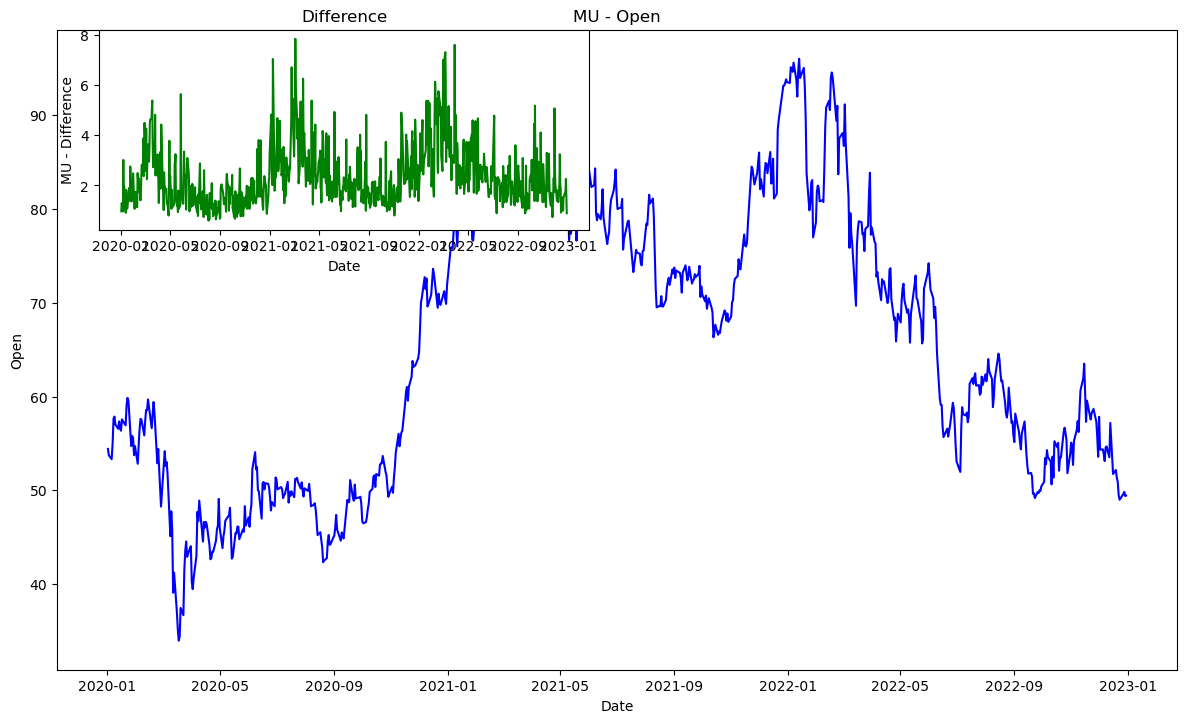

In [113]:
df = web.DataReader(stock_data, data_source='stooq', start='2020-01-01', end='2023-01-01')
df['diff'] = df['High'] - df['Low']

fig = plt.figure(figsize=(14,8))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
axes2 = fig.add_axes([0.13, 0.65, 0.35, 0.25])

axes1.plot(df['Open'], 'b')
axes1.set_xlabel('Date')
axes1.set_ylabel('Open')
axes1.set_title('MU - Open')

axes2.set_title('Difference')
axes2.plot(df['diff'],'g')
axes2.set_xlabel('Date')
axes2.set_ylabel('MU - Difference')


- <b>d) For each year period compute the mean price for the "Open", "High" and "Low" data and plot them as a histogram for each year period: 2020, 2021 and 2022. 

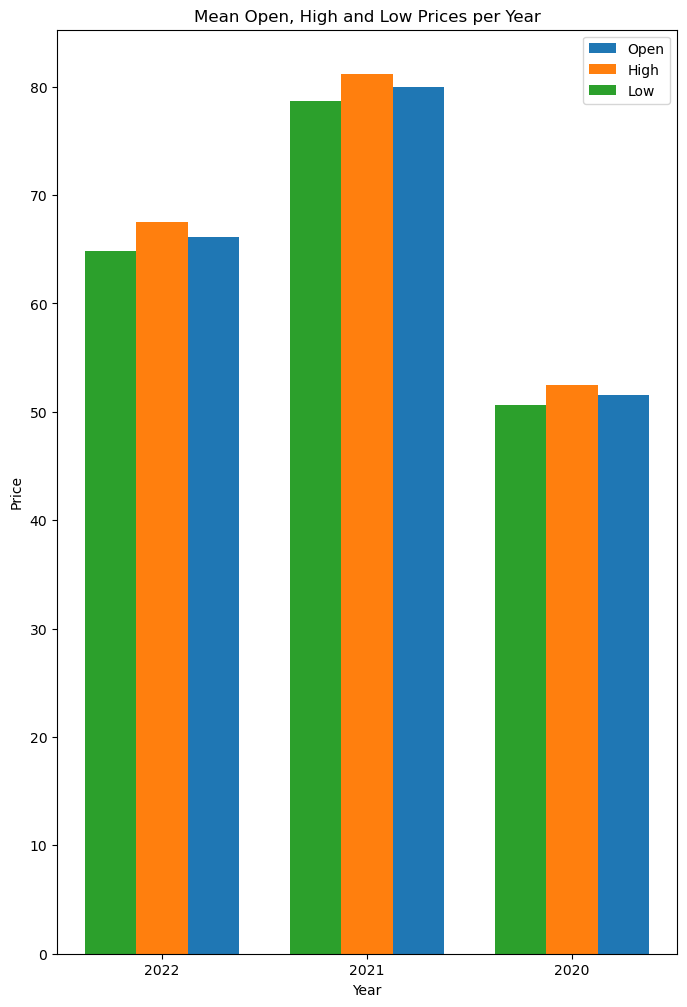

In [54]:
mean_prices = df.groupby(df.index.year)[['Open', 'High', 'Low']].mean()

fig, ax = plt.subplots(figsize=(8, 12))

positions = np.arange(len(mean_prices))

ax.bar(positions, mean_prices['Open'], width=0.25, label='Open')
ax.bar(positions + 0.25, mean_prices['High'], width=0.25, label='High')
ax.bar(positions + 0.5, mean_prices['Low'], width=0.25, label='Low')

ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('Mean Open, High and Low Prices per Year')

ax.set_xticks(positions + 0.25)
ax.set_xticklabels(mean_prices.index)
ax.invert_xaxis()

ax.legend()

plt.show()


Expected output structure will look like this.

![img](https://github.com/GeoTurkey/GMT_COURSES/blob/main/bar_stock_price.png?raw=true)

## TASK5 (20 pts)

<b>In this task, you will analyse the geo-referenced GeoTIFF image you produced in the first task. You will use a NumPy, Matplotlib libraries and GDAL module. Please complete the tasks below.

- <b>a) Import necessary libraries and modules (gdal, numpy, matplotlib) and load your tiff image (geo-referenced MapRegion image). 

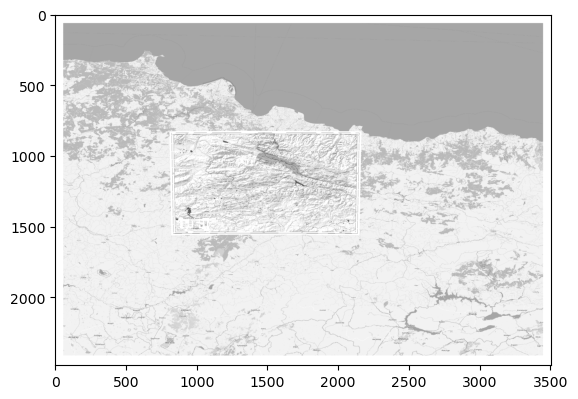

In [25]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

file_path = "C:\\Users\\ASUS\\Desktop\\Tokat Fiziki Harita (Georeferencing).tiff"

ds = gdal.Open(file_path)
band = ds.GetRasterBand(1)
image_data = band.ReadAsArray()

plt.imshow(image_data, cmap='gray')
plt.show()


- <b>b) Write the code that prints a number of raster bands and coordinate system of your image. 

In [56]:
gdal_info = gdal.Open(file_path)
print("Number of raster bands:", gdal_info.RasterCount)
print("Coordinate system:", gdal_info.GetProjection())

Number of raster bands: 4
Coordinate system: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]


- <b>c) Convert all raster bands of the image into numpy arrays and print the size of each array. 

In [55]:
ds = gdal.Open(file_path)

for i, band in enumerate(ds.ReadAsArray(), start=1):
    print(f"Band {i} size: {band.shape}")

Band 1 size: (2480, 3507)
Band 2 size: (2480, 3507)
Band 3 size: (2480, 3507)
Band 4 size: (2480, 3507)


- <b>d) For each array generated above calculate the average cell value and subtract it from the original array. Now you have three original arrays and three -mean value subtracted- arrays. Then plot a 3 x 2 subplot that one column will display the original arrays and the second one will display the mean value subtracted ones. Please write the whole code block which does all that.

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

dataset = gdal.Open("C:\\Users\\ASUS\\Desktop\\Tokat Fiziki Harita (Georeferencing).tiff")

num_bands = dataset.RasterCount

fig, axs = plt.subplots(nrows=num_bands, ncols=2, figsize=(10, 10))
fig.tight_layout(pad=3.0)

for i in range(1, num_bands+1):
    band = dataset.GetRasterBand(i)
    array = band.ReadAsArray()
    mean = np.mean(array)
    mean_subtracted = array - mean

    axs[i-1, 0].imshow(array)
    axs[i-1, 0].set_title(f"Band {i} (original)")


    axs[i-1, 1].imshow(mean_subtracted)
    axs[i-1, 1].set_title(f"Band {i} (mean-subtracted)")

    print(f"Size of array for band {i}: {array.shape}")
    print(f"Mean of array for band {i}: {mean}\n")

plt.show()

AttributeError: 'NoneType' object has no attribute 'RasterCount'

###  BONUS TASK
- 3D geographic (geodetic) coordinates can be used to define a position on the surface of the Earth (point P in figure below). The latitude ($\phi$) and longitude($\lambda$) angles and the ellipsoidal height (h) represent the 3D gegraphic coordinate system. The ellipsoidal height (h) of a point is the vertical distance of the point above the ellipsoid. 


![](https://kartoweb.itc.nl/geometrics/Bitmaps/Coord%202.4c.gif) 

- An alternative method of defining a 3D position on the surface of the Earth is by means of Cartesian (geocentric) coordinates (X,Y,Z) as illustrated below.
![](https://kartoweb.itc.nl/geometrics/Bitmaps/3D%20geocentric%20coordinates.gif)



Geographic coordinates (latitude, longitude and height) can be converted into Cartesian coordinates using the following equation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3f4c631b7cecf450ead22e4a77a1301a42f1dab8)

where the prime vertical radius of curvature N($\phi$) is the distance from the surface to the Z-axis along the ellipsoid normal and can be computed as:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e7f79cb63934a4e1002224e7084370e22f3e97f9)

where a = 6378137.0  and b = 6356752.3 are the equatorial radius (semi-major axis) and the polar radius (semi-minor axis), respectively.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a74130b944efd8b9342c2e12bb8823dd53013086)

is the square of the first numerical eccentricity of the ellipsoid.

**Important**: 
- **All angles are in *radians***.
- **Distances are in meters**.


###  BONUS TASK
- 3D geographic (geodetic) coordinates can be used to define a position on the surface of the Earth (point P in figure below). The latitude ($\phi$) and longitude($\lambda$) angles and the ellipsoidal height (h) represent the 3D gegraphic coordinate system. The ellipsoidal height (h) of a point is the vertical distance of the point above the ellipsoid. 


![](https://kartoweb.itc.nl/geometrics/Bitmaps/Coord%202.4c.gif) 

- An alternative method of defining a 3D position on the surface of the Earth is by means of Cartesian (geocentric) coordinates (X,Y,Z) as illustrated below.
![](https://kartoweb.itc.nl/geometrics/Bitmaps/3D%20geocentric%20coordinates.gif)



Geographic coordinates (latitude, longitude and height) can be converted into Cartesian coordinates using the following equation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3f4c631b7cecf450ead22e4a77a1301a42f1dab8)

where the prime vertical radius of curvature N($\phi$) is the distance from the surface to the Z-axis along the ellipsoid normal and can be computed as:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e7f79cb63934a4e1002224e7084370e22f3e97f9)

where a = 6378137.0  and b = 6356752.3 are the equatorial radius (semi-major axis) and the polar radius (semi-minor axis), respectively.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a74130b944efd8b9342c2e12bb8823dd53013086)

is the square of the first numerical eccentricity of the ellipsoid.

**Important**: 
- **All angles are in *radians***.
- **Distances are in meters**.


In [58]:
 import math

def geodetic_to_cartesian(latitude, longitude, height):
    a = 6378137.0 
    b = 6356752.3 
    e_squared = (a**2 - b**2) / a**2
    sin_latitude = math.sin(latitude)
    cos_latitude = math.cos(latitude)
    sin_longitude = math.sin(longitude)
    cos_longitude = math.cos(longitude)
    N = a / math.sqrt(1 - e_squared * sin_latitude**2) 
    X = (N + height) * cos_latitude * cos_longitude
    Y = (N + height) * cos_latitude * sin_longitude
    Z = ((1 - e_squared) * N + height) * sin_latitude
    return X, Y, Z

In [59]:
latitude = 40.00201
longitude = 32.86656
height = 979

x, y, z = geodetic_to_cartesian(latitude, longitude, height)
print(f"Cartesian Coordinates: ({x}, {y}, {z})")

Cartesian Coordinates: (-512093.7103814408, -4241132.382458367, 4721594.383455802)
